""" Dataset Description
1) ID number
2) Outcome (R = recur, N = nonrecur)
3) Time (recurrence time if field 2 = R, disease-free time if
	field 2	= N)
4-33) Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed.

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 4 is Mean Radius, field
14 is Radius SE, field 24 is Worst Radius.

Values for features 4-33 are recoded with four significant digits.

34) Tumor size - diameter of the excised tumor in centimeters
35) Lymph node status - number of positive axillary lymph nodes
observed at time of surgery """

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
col_names = ['id',
             'outcome',
             'time',
             'mean_radius',
             'mean_texture',
             'mean_perimeter',
             'mean_area',
             'mean_smoothness',
             'mean_compactness',
             'mean_concavity',
             'mean_concave_points', 
             'mean_symmetry',
             'mean_fractal_dimension',
             'se_radius',
             'se_texture',
             'se_perimeter',
             'se_area',
             'se_smoothness',
             'se_compactness',
             'se_concavity',
             'se_concave_points',
             'se_symmetry',
             'se_fractal_dimension',
             'worst_radius',
             'worst_texture',
             'worst_perimeter',
             'worst_area',
             'worst_smoothness',
             'worst_compactness',
             'worst_concavity',
             'worst_concave_points',
             'worst_symmetry',
             'worst_fractal_dimension',
             'tumor_size',
             'lymph_node_status',
             ]

In [3]:
dataset = pd.read_csv('wpbc.data', names=col_names)
dataset.head()

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


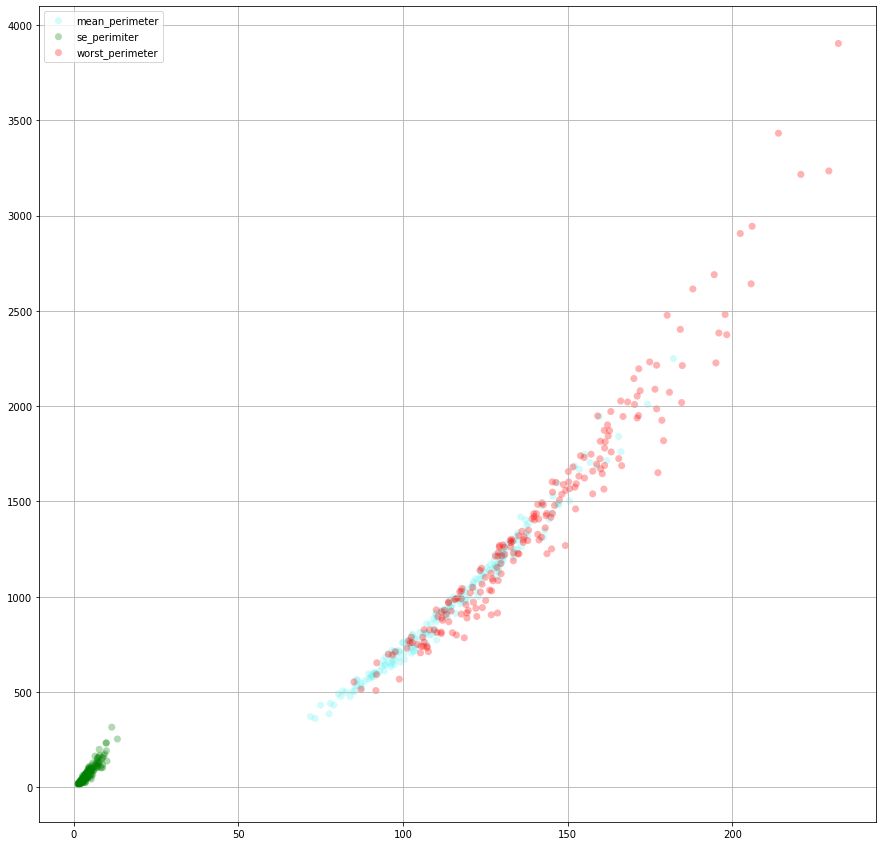

In [4]:
values = {
    '#6ff4f4': (dataset.mean_perimeter, dataset.mean_area),
    'green': (dataset.se_perimeter, dataset.se_area),
    'red': (dataset.worst_perimeter, dataset.worst_area),
}

fig, ax = plt.subplots(figsize=(15, 15))
for color in ['#6ff4f4', 'green', 'red']:
    x, y = values[color]
    scale = 50.0
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend(['mean_perimeter', 'se_perimiter', 'worst_perimeter'])
ax.grid(True)

plt.show()

In [5]:
# sort dataframe by column mean_perimeter
dataset = dataset.sort_values(by=['mean_perimeter'])
dataset.head()

,id,outcome,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_node_status
33,855563,N,99,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,...,87.22,514.0,0.1909,0.26980,0.4023,0.1424,0.2964,0.09606,2.7,0
137,9013838,N,7,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,...,91.76,508.1,0.2184,0.93790,0.8402,0.2524,0.4154,0.14030,2.0,0
119,892189,N,1,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,...,85.10,553.6,0.1137,0.07974,0.0612,0.0716,0.1978,0.06915,10.0,18
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.86630,0.6869,0.2575,0.6638,0.17300,2.0,0
24,853612,N,116,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,...,119.40,888.7,0.1637,0.57750,0.6956,0.1546,0.4761,0.14020,3.0,2


In [6]:
X, y = dataset.mean_perimeter, dataset.mean_area
X = X.values.reshape(198, 1)

In [7]:
# create linear regression object
regr = LinearRegression()
# fit the model
regr.fit(X, y)
predictions = regr.predict(X)

equation = 'Linear Regression: ' + 'y=' + str(round(regr.coef_[0], 3)) + 'x' + str(round(regr.intercept_, 3))
equation

'Linear Regression: y=16.315x-903.863'

In [8]:
# polynomial regression
# one extra step: transform the array of inputs to include non-linear terms such as X^2
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [9]:
X_[0:5]

array([[  71.9   , 5169.61  ],
       [  73.3   , 5372.89  ],
       [  75.    , 5625.    ],
       [  77.58  , 6018.6564],
       [  77.93  , 6073.0849]])

The modified input array contains two columns: one with the original inputs and the other with their squares.

In [10]:
# create model and fit
poly_regr = LinearRegression().fit(X_, y)

predictions_ = poly_regr.predict(X_)

equation_ = 'Polynomial Regression: ' + 'y=' + str(round(poly_regr.coef_[0], 3)) + 'x' + str(round(poly_regr.intercept_, 3))
equation_

'Polynomial Regression: y=5.388x-275.167'

In [11]:
predictions_[0:5]

array([349.5032286 , 366.37644325, 387.10722403, 419.0760457 ,
       423.45996874])

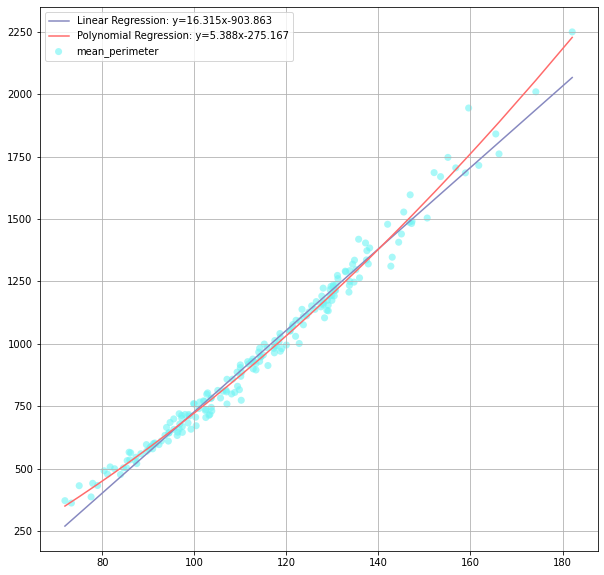

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
x, y = dataset.mean_perimeter, dataset.mean_area
scale = 50.0
ax.scatter(x, y, c='#6ff4f4', s=scale, label='#6ff4f4',
            alpha=0.6, edgecolors='none')

ax.plot(X, predictions, c='#8789C0', label='#8789C0')
ax.plot(X, predictions_, c='#FF6B6B', label='#FF6B6B')
ax.legend([equation, equation_, 'mean_perimeter', 'se_perimiter', 'worst_perimeter'])
ax.grid(True)

plt.show()

In [13]:
# calculate the Pearsons's correlation between two variables (perimeter and area)
corr, _ = pearsonr(dataset.mean_perimeter, dataset.mean_area)
corr

0.9906987980640461

In [14]:
dataset.to_csv('wisconsin_prognostic_breasts_cancer.csv')